In [58]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [59]:
filename = "Cleaneddata - Sheet1.csv"

df = pd.read_csv(filename, header=0)
data = df

In [60]:
df.values

array([['AMG Technology Solutions', 72393.0, '1 to 3', 'Austin',
        'Business Analyst'],
       ['AMG Technology Solutions', 110696.5, '4 to 6', 'Austin',
        'Business Analyst'],
       ['AMG Technology Solutions', 149000.0, '7 to 10', 'Austin',
        'Business Analyst'],
       ..., 
       ['Accenture', 68791.0, '1 to 3', 'Austin', 'Business Analyst'],
       ['Accenture', 108895.5, '4 to 6', 'Austin', 'Business Analyst'],
       ['Accenture', 149000.0, '7 to 10', 'Austin', 'Business Analyst']], dtype=object)

# Salary Distribution

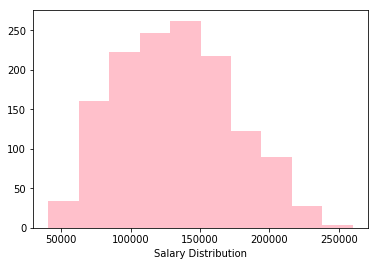

In [61]:
plt.xlabel("Salary Distribution")
plt.hist(df["Salary"], color = "pink")
plt.show()

# Comparing Salary with respect to Location

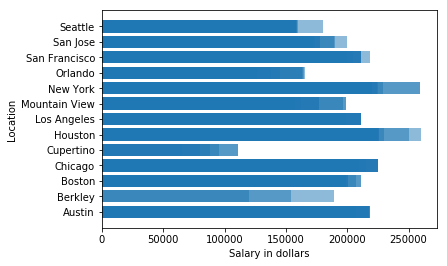

In [62]:
plt.barh(df["Location"], df["Salary"], align= "center", alpha = 0.5)
plt.ylabel("Location")
plt.xlabel("Salary in dollars")
plt.show()

# Comparing Salary with respect to Yrs of Experience

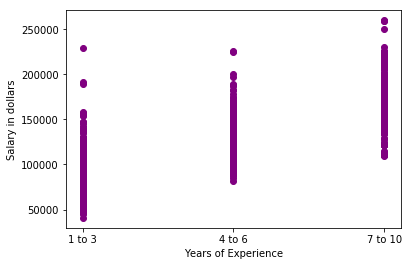

In [63]:
plt.scatter(df["Years of Experience"], df["Salary"], color = 'purple')
plt.xlabel("Years of Experience")
plt.ylabel("Salary in dollars")
plt.show()

In [64]:
exp = {'1 to 3': 0, '4 to 6': 1, '7 to 10': 2}
data['Years of Experience'] = data['Years of Experience'].map(exp)
data.head()

,Company Name,Salary,Years of Experience,Location,Job Title
0,AMG Technology Solutions,72393.0,0,Austin,Business Analyst
1,AMG Technology Solutions,110696.5,1,Austin,Business Analyst
2,AMG Technology Solutions,149000.0,2,Austin,Business Analyst
3,Accenture,68791.0,0,Austin,Business Analyst
4,Accenture,108895.0,1,Austin,Business Analyst


In [65]:
city = {"Austin": 0, "Berkley":1, "Boston": 2, "Chicago": 3, "Cupertino": 4, "Houston": 5, "Los Angeles": 6, 
        "Mountain View":7, "New York": 8, "Orlando": 9, "San Francisco":10, "San Jose": 11, "Seattle": 12}
data["Location"] = data["Location"].map(city)
data.head()

,Company Name,Salary,Years of Experience,Location,Job Title
0,AMG Technology Solutions,72393.0,0,0,Business Analyst
1,AMG Technology Solutions,110696.5,1,0,Business Analyst
2,AMG Technology Solutions,149000.0,2,0,Business Analyst
3,Accenture,68791.0,0,0,Business Analyst
4,Accenture,108895.0,1,0,Business Analyst


In [66]:
data.tail()

,Company Name,Salary,Years of Experience,Location,Job Title
1384,AMG Technology Solutions,107000.0,1,0,Business Analyst
1385,AMG Technology Solutions,149000.0,2,0,Business Analyst
1386,Accenture,68791.0,0,0,Business Analyst
1387,Accenture,108895.5,1,0,Business Analyst
1388,Accenture,149000.0,2,0,Business Analyst


In [67]:
data.head(50)

,Company Name,Salary,Years of Experience,Location,Job Title
0,AMG Technology Solutions,72393.0,0,0,Business Analyst
1,AMG Technology Solutions,110696.5,1,0,Business Analyst
2,AMG Technology Solutions,149000.0,2,0,Business Analyst
3,Accenture,68791.0,0,0,Business Analyst
4,Accenture,108895.0,1,0,Business Analyst
5,Accenture,153456.0,2,0,Business Analyst
6,Dell,74396.0,0,0,Business Analyst
7,Dell,110698.0,1,0,Business Analyst
8,Dell,151000.0,2,0,Business Analyst
9,Department Of Family And Protective Services,60852.0,0,0,Business Analyst


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X = data.iloc[:, 2:3]
y = data.iloc[:, 1:2]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

train_x_set = xtrain
train_y_set = ytrain
test_x_set = xtest
test_y_set = ytest

In [81]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
clf = regr.fit(train_x_set, train_y_set)

# Make predictions using the testing set
Sal_y_pred = regr.predict(test_x_set)

#Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y_set, Sal_y_pred))

Mean squared error: 481072086.71


In [82]:
clf.score(test_y_set, Sal_y_pred)

-28564941256.487541

# Knn Algorithm

In [89]:
from sklearn.neighbors import KNeighborsRegressor

X = data.iloc[:, 2:3]
y = data.iloc[:, 1:2]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = KNeighborsRegressor()

clf1 = classifier.fit(train_x_set, train_y_set)

In [92]:
clf1.predict([[0]])

array([[ 104632.96]])